In [21]:
import numpy as np
import pandas as pd
import sklearn.datasets as dt
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer,make_classification,make_blobs,make_circles,load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import  mean_squared_error
import io
from scipy import stats
from sklearn.utils import shuffle
from scipy.io import loadmat
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
!pip install scipy
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
from drawdata import ScatterWidget
from mlxtend.plotting import plot_decision_regions

۲ با استفاده از datasets.sklearn، یک دیتاست با ۱۰۰۰ نمونه، ۴ کلاس و ۳ ویژگی تولید کنید و آن را به صورتی
مناسب نمایش دهید.

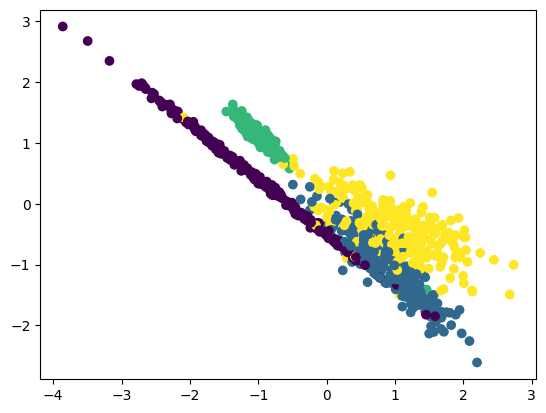

In [56]:

# ساخت داده‌های مصنوعی با 1000 نمونه، 4 کلاس و 3 ویژگی
X, y = make_classification(n_samples=1000, n_features=3,  n_informative=2, n_redundant=1, n_repeated=0, n_classes=4, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0,  shift=0.0, scale=1.0,  random_state=21)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()


۳ با استفاده از حداقل دو طبقه بند خطی آمادۀ پایتون (در model_linear.sklearn (و در نظر گرفتن فراپارامترهای
مناسب، چهار کلاس موجود در دیتاست قسمت قبلی را از هم تفکیک کنید. ضمن توضیح روند انتخاب فراپارامترها
(مانند تعداد دورۀ آموزش و نرخ یادگیری)، نتیجۀ دقت آموزش و ارزیابی را نمایش دهید. برای بهبود نتیجه از چه
تکنیک هایی استفاده کردید؟

In [ ]:

# ساخت داده‌های مصنوعی با 1000 نمونه، 4 کلاس و 3 ویژگی
X, y = make_classification(n_samples=1000, n_features=3,  n_informative=2, n_redundant=1, n_repeated=0, n_classes=4, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0,  shift=0.0, scale=1.0,  random_state=21)

# تقسیم داده‌ها به داده‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش دو مدل طبقه‌بند خطی
model1 = LinearSVC()
model2 = LinearSVC()

# آموزش مدل اول بر روی دو کلاس اول و دوم
model1.fit(X_train, y_train < 2)

# آموزش مدل دوم بر روی دو کلاس سوم و چهارم
model2.fit(X_train, y_train >= 2)

# اعمال مدل‌ها بر روی داده‌های تست
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# گزارش طبقه‌بندی
print("Classification Report for Model 1:")
print(classification_report(y_test < 2, y_pred1))

print("\nClassification Report for Model 2:")
print(classification_report(y_test >= 2, y_pred2))



Classification Report for Model 1:
              precision    recall  f1-score   support

       False       0.92      0.99      0.95       100
        True       0.99      0.91      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200


Classification Report for Model 2:
              precision    recall  f1-score   support

       False       0.99      0.91      0.95       100
        True       0.92      0.99      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



۴ مرز و نواحی تصمیم گیری برآمده از مدل آموزش دیدۀ خود را به همراه نمونه ها در یک نمودار نشان دهید. اگر می توانید
نمونه هایی که اشتباه طبقه بندی شده اند را با شکل و رنگ متفاوت نمایش دهید.

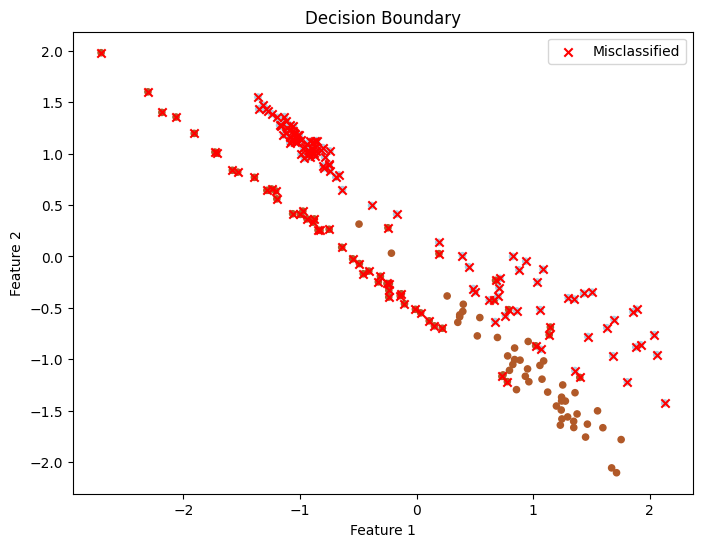

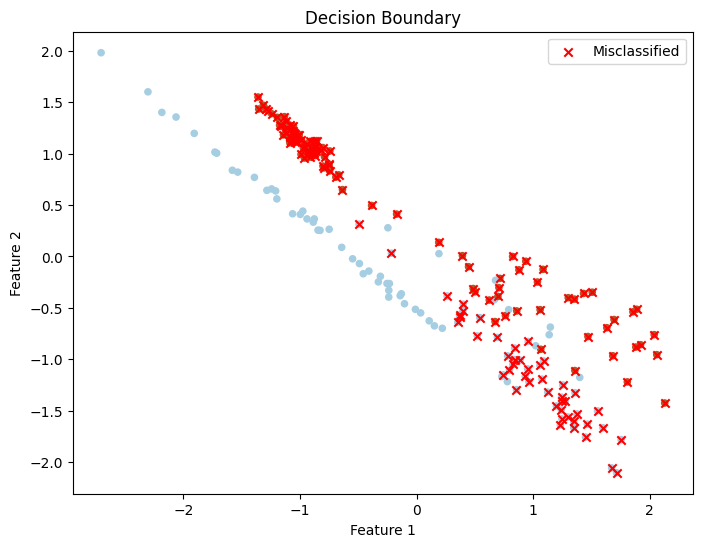

In [ ]:
# ساخت داده‌های مصنوعی با 1000 نمونه، 4 کلاس و 3 ویژگی
X, y =make_classification(n_samples=1000, n_features=3,  n_informative=2, n_redundant=1, n_repeated=0, n_classes=4, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0,  shift=0.0, scale=1.0,  random_state=21)
# تقسیم داده‌ها به داده‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش دو مدل طبقه‌بند خطی
model1 = LinearSVC()
model2 = LinearSVC()

# آموزش مدل اول بر روی دو کلاس اول و دوم
model1.fit(X_train, y_train < 2)
# آموزش مدل دوم بر روی دو کلاس سوم و چهارم
model2.fit(X_train, y_train >= 2)
# پیش‌بینی کلاس‌ها برای داده‌های آزمون
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
# محاسبه دقت آزمون
accuracy1 = accuracy_score(y_test < 2, y_pred1)
accuracy2 = accuracy_score(y_test >= 2, y_pred2)
# نمایش نمونه‌هایی که اشتباه طبقه‌بندی شده‌اند
wrong_indices1 = np.where(y_test != y_pred1)[0]
wrong_indices2 = np.where(y_test != y_pred2)[0]
# نمایش مرز و نواحی تصمیم‌گیری
def plot_decision_boundary(model, X, y, wrong_indices):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
    plt.scatter(X[wrong_indices, 0], X[wrong_indices, 1], marker='x', c='red', label='Misclassified')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()

# نمایش مرز و نواحی تصمیم‌گیری و نمونه‌های اشتباه طبقه‌بندی شده
plot_decision_boundary(model1, X_test, y_test < 2, wrong_indices1)
plot_decision_boundary(model2, X_test, y_test >= 2, wrong_indices2)

plt.show()


In [59]:
!pip install drawdata
!pip install pandas polars
from drawdata import ScatterWidget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.8/246.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.6/730.6 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.1 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
 pip install drawdata

۵ فرآیندی مشابه قسمت «۲» را با تعداد کلاس و ویژگی دلخواه؛ اما با استفاده از ابزار drawdata تکرار کنید.
قسمت های «۳» و «۴» را برای این داده های جدید تکرار و نتایج را به صورتی مناسب نشان دهید.

In [3]:
widget = ScatterWidget()
widget

ScatterWidget()

In [5]:
dataset = widget.data_as_pandas
x1 = dataset['x'].values
x2 = dataset['y'].values
X0 = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1)], axis=1)
o = dataset["label"].values
y0 = np.where(o == 'a', 1, 0)
x_train, x_test, y_train, y_test = train_test_split(X0, y0, test_size=0.2, random_state=21)

Logisticregression

In [6]:
model1 = LogisticRegression(solver='sag', max_iter=500, random_state=21)
model1.fit(x_train, y_train)
print("Logistic Regression")
print(" Train data score:",format(model1.score(x_train, y_train)))
print(" Test data score:",format(model1.score(x_test, y_test)))

Logistic Regression
 Train data score: 0.7523809523809524
 Test data score: 0.7663043478260869


ناحیه تصمیم گیری

<Axes: >

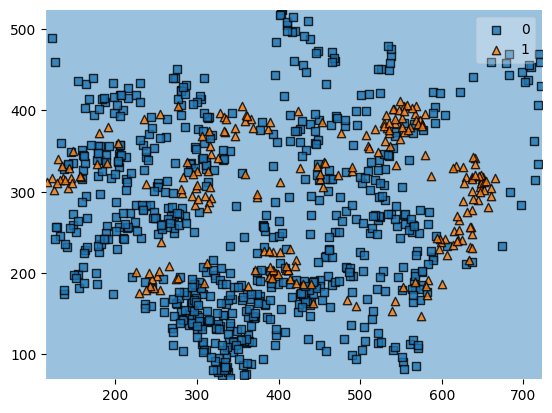

In [8]:
plot_decision_regions(X0, y0, clf=model1)

SGD

SGDClassifier
 Train data score: 0.7523809523809524
 Test data score: 0.7663043478260869


<Axes: >

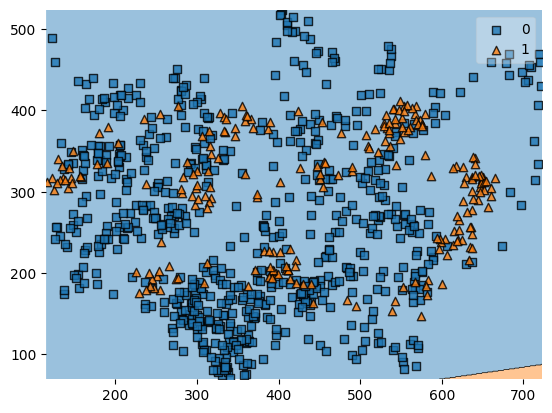

In [12]:
model2 = SGDClassifier(loss='log_loss', random_state=21)
model2.fit(x_train, y_train)
print("SGDClassifier")
print(" Train data score:",format(model2.score(x_train, y_train)))
print(" Test data score:",format(model2.score(x_test, y_test)))
plot_decision_regions(X0, y0, clf=model2)

ب) در مورد اهمیت استخراج ویژگی در یادگیری ماشین توضیحاتی بنویسید. سپس، با استفاده از حداقل ۸ عدد
از روش های ذکرشده در جدول ،۱ ویژگی های دیتاست قسمت «۲‐آ» را استخراج کنید و یک دیتاست جدید
تشکیل دهید.

In [13]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Qyn2eK3F28M4UTTpYneHH-KcMdVQFXCG
!gdown 1BKKcpTNN7cnLlqWjGp73F2TaoTQkCeNR

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From (original): https://drive.google.com/uc?id=1Qyn2eK3F28M4UTTpYneHH-KcMdVQFXCG
From (redirected): https://drive.google.com/uc?id=1Qyn2eK3F28M4UTTpYneHH-KcMdVQFXCG&confirm=t&uuid=a1f41afa-fc2a-40dc-ba62-0b5b8d7b32f8
To: /content/97.mat
100% 3.90M/3.90M [00:00<00:00, 191MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1BKKcpTNN7cnLlqWjGp73F2TaoTQkCeNR
From (redirected): https://drive.google.com/uc?id=1BKKcpTNN7cnLlqWjGp73F2TaoTQkCeNR&confirm=t&uuid=12faa8fc-1331-49c2-a2a6-da9969c94682
To: /content/105.mat
100% 2.91M/2.91M [00:00<00:00, 177MB/s]


In [ ]:
from scipy.io import loadmat
import numpy as np

class Dataset:
    def __init__(self, data_path, num_samples=200, sample_length=350):
        self.data_path = data_path
        self.num_samples = num_samples
        self.sample_length = sample_length
        self.features = None
        self.labels = None

    def load_data(self):
        data = loadmat(self.data_path)
        self.features = data['X097_FE_time'][:self.num_samples, :self.sample_length]
        self.labels = data['X097_DE_time'][:self.num_samples]

    def get_samples(self):

        return self.features, self.labels
    def extract_class_data(self, class_label):
        # استخراج داده‌های مربوط به یک کلاس خاص
        class_indices = np.where(self.labels == class_label)[0]
        class_data = self.features[class_indices]
        return class_data
data_path ="/content/97.mat"  # مسیر دیتاسنتر شما
dataset = Dataset(data_path, num_samples=200, sample_length=350)
dataset.load_data()
features, labels = dataset.get_samples()
print("Shape of features:", features.shape)
print("Shape of labels:", labels.shape)

class_0_data = dataset.extract_class_data(0)
class_1_data = dataset.extract_class_data(1)

print("Shape of class 0 data:", class_0_data.shape)
print("Shape of class 1 data:", class_1_data.shape)






Shape of features: (200, 1)
Shape of labels: (200, 1)
Shape of class 0 data: (0, 1)
Shape of class 1 data: (0, 1)


In [17]:
df= sio.loadmat('97.mat')
normal = df['X097_DE_time']
df_fault = sio.loadmat('105.mat')
fault = df_fault['X105_DE_time']

۲ برای تشکیل دیتاست مراحل زیر را انجام دهبد:
آ) از هر کلاس Ⅿ نمونه با طول N جدا کنید (Ⅿ حداقل ۱۰۰ و N حداقل ۲۰۰ باشد). یک ماتریس از داده های
هر دو کلاس به همراه برچسب مربوطه تشکیل دهید. می توانید پنجره ای به طول N در نظر بگیرید و در نهایت
یک ماتریس N × Ⅿ از داده های هر کلاس استخراج کنید.

In [25]:
M = 200
N = 200
d_mat = np.zeros((M, N))
for i in range(M):
  if i + N <= len(normal):
     d_mat[i, :] = normal[i:i + N].reshape(-1,)
  else:
      d_mat[i, :] = np.nan

f_mat = np.zeros((M, N))
for i in range(M):
  if i + N <= len(fault):
      f_mat[i, :] = fault[i:i + N].reshape(-1,)
  else:
      f_mat[i, :] = np.nan

print(f'Normal : d_mat \n shape: {d_mat.shape}')
print(f'Fault : f_mat \n shape: {f_mat.shape}')

Normal : d_mat 
 shape: (200, 200)
Fault : f_mat 
 shape: (200, 200)


In [ ]:
from typing_extensions import final
# سوال 2 الف
import scipy.io
import numpy as np

# خواندن داده‌ها از فایل‌های mat
data_105 = scipy.io.loadmat('105.mat')
data_97 = scipy.io.loadmat('97.mat')

# استخراج داده‌ها و برچسب‌ها
X_97 = data_97['X097_DE_time'][:200]  # 200 نمونه از کلاس 97
X_105 = data_105['X105_DE_time'][:200]  # 200 نمونه از کلاس 105

# ایجاد برچسب‌ها
y_97 = np.zeros((200, 199))  # برچسب 0 برای کلاس 97
y_105 = np.ones((200, 199))  # برچسب 1 برای کلاس 105

# ترکیب داده‌ها و برچسب‌ها
data_97 = np.hstack((X_97, y_97))
data_105 = np.hstack((X_105, y_105))

# ایجاد ماتریس ۲۰۰ در ۲۰۰ از داده‌های هر کلاس
final_data_97 = data_97[:200, :]
final_data_105 = data_105[:200, :]
combined_matrix=np.hstack((final_data_97,final_data_105))
final_data_105.shape
final_data_97.shape


(200, 200)

In [ ]:
print(final_data_97)

[[0.05319692 0.         0.         ... 0.         0.         0.        ]
 [0.08866154 0.         0.         ... 0.         0.         0.        ]
 [0.09971815 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.10013538 0.         0.         ... 0.         0.         0.        ]
 [0.10597662 0.         0.         ... 0.         0.         0.        ]
 [0.10326462 0.         0.         ... 0.         0.         0.        ]]


In [ ]:
print(final_data_105)

[[-0.08300435  1.          1.         ...  1.          1.
   1.        ]
 [-0.19573433  1.          1.         ...  1.          1.
   1.        ]
 [ 0.23341928  1.          1.         ...  1.          1.
   1.        ]
 ...
 [ 0.20775453  1.          1.         ...  1.          1.
   1.        ]
 [ 0.30456587  1.          1.         ...  1.          1.
   1.        ]
 [-0.03865956  1.          1.         ...  1.          1.
   1.        ]]


ب) در مورد اهمیت استخراج ویژگی در یادگیری ماشین توضیحاتی بنویسید. سپس، با استفاده از حداقل ۸ عدد
از روش های ذکرشده در جدول ،۱ ویژگی های دیتاست قسمت «۲‐آ» را استخراج کنید و یک دیتاست جدید
تشکیل دهید.

FEATURE DEFINE FUNCTION

In [22]:
class Features:

    def __init__(self,matrix):
        self.matrix = matrix

    def extract(self):
        self.features = {
            'standard deviation': stats.tstd(self.matrix, axis=1),
            'peak': np.max(np.abs(self.matrix), axis=1),
            'skewness': stats.skew(self.matrix, axis=1),
            'kurtosis': stats.kurtosis(self.matrix, axis=1),
            'crest factor': np.max(np.abs(self.matrix), axis=1) / np.sqrt(np.mean(np.square(self.matrix), axis=1)),
            'clearance factor': np.max(np.abs(self.matrix), axis=1) / np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'peak to peak': np.max(self.matrix, axis=1) - np.min(self.matrix, axis=1),
            'square mean root': np.square(np.mean(np.sqrt(np.abs(self.matrix)), axis=1)),
            'mean': np.mean(self.matrix, axis=1),
            'absolute mean': np.mean(np.abs(self.matrix), axis=1),
            'root mean square': np.sqrt(np.mean(np.square(self.matrix), axis=1)),
            'impulse factor': np.max(np.abs(self.matrix), axis=1) / np.mean(np.abs(self.matrix), axis=1),
        }

In [28]:
n_features = Features(d_mat)
n_features.extract()
f_features = Features(f_mat)
f_features.extract()
n_df = pd.DataFrame(n_features.features)
f_df = pd.DataFrame(f_features.features)
n_df['label'] = np.zeros((n_df.shape[0],), dtype='int8')
f_df['label'] = np.ones((f_df.shape[0],), dtype='int8')
df = pd.concat ([n_df, f_df], ignore_index=True)


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# محاسبه ویژگی‌ها
std_deviation = np.std(final_data_97)
root_mean_square = np.sqrt(np.mean(final_data_97**2))
mean = np.mean(final_data_97)
positive_mean = np.mean(np.abs(final_data_97))
scalar = MinMaxScaler(final_data_97)
# ایجاد دیتافریم جدید از ویژگی‌های استخراج شده
features_dataset = np.array([std_deviation, root_mean_square, mean, positive_mean,scalar])

# چاپ دیتاست ویژگی‌ها
print(features_dataset)


[0.006349101451879319 0.00634941974477564 6.357553846153845e-05
 0.0003788455384615385
 MinMaxScaler(feature_range=array([[0.05319692, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.08866154, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.09971815, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.10013538, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.10597662, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.10326462, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))                                                                             ]


ج) ضمن توضیح اهمیت فرآیند برزدن (مخلوط کردن)
به دو بخش «آموزش» و «ارزیابی» تقسیم کنید.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
x=features
y=labels

#  x.shape = (m, n) و y.shape = (m,)

x_shuffled, y_shuffled = shuffle(x, y, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_shuffled, y_shuffled, test_size=0.2, random_state=42)

print(x_train)
print("\n")
print(x_test)


[[-0.16272   ]
 [ 0.18408727]
 [ 0.09019455]
 [ 0.05917091]
 [-0.09841273]
 [-0.06985455]
 [-0.00472545]
 [ 0.25887273]
 [-0.09820727]
 [ 0.07642909]
 [ 0.16004909]
 [ 0.16169273]
 [ 0.09574182]
 [ 0.06492364]
 [ 0.1582    ]
 [-0.06286909]
 [-0.00410909]
 [-0.05444545]
 [ 0.09142727]
 [ 0.02753091]
 [ 0.09492   ]
 [-0.00369818]
 [-0.01314909]
 [ 0.06533455]
 [ 0.01766909]
 [-0.08156545]
 [-0.10375455]
 [ 0.10108364]
 [ 0.09266   ]
 [ 0.03698182]
 [ 0.13149091]
 [-0.01684727]
 [-0.04150182]
 [ 0.02506545]
 [ 0.10827455]
 [-0.03348909]
 [ 0.08033273]
 [-0.02629818]
 [ 0.05444545]
 [ 0.14566727]
 [-0.07642909]
 [ 0.07560727]
 [-0.07848364]
 [ 0.05608909]
 [ 0.02383273]
 [ 0.07047091]
 [-0.01006727]
 [ 0.03903636]
 [-0.12204   ]
 [-0.08690727]
 [-0.00369818]
 [ 0.01520364]
 [ 0.07252545]
 [ 0.08464727]
 [ 0.0452    ]
 [ 0.12553273]
 [ 0.10786364]
 [ 0.21346727]
 [ 0.23052   ]
 [-0.08238727]
 [ 0.06759455]
 [ 0.12882   ]
 [ 0.09101636]
 [ 0.08834545]
 [-0.04725455]
 [ 0.24120364]
 [ 0.15388

نرمال سازی داده ها

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)
x_test_normalized

array([[0.28817204],
       [0.56086022],
       [0.63096774],
       [0.40043011],
       [0.80258065],
       [0.39526882],
       [0.5711828 ],
       [0.27913978],
       [0.5427957 ],
       [0.3316129 ],
       [0.40215054],
       [0.40688172],
       [0.4688172 ],
       [0.33634409],
       [0.23655914],
       [0.20516129],
       [0.57290323],
       [0.80774194],
       [0.63913978],
       [0.91053763],
       [0.27827957],
       [0.79655914],
       [0.90193548],
       [0.63698925],
       [0.28774194],
       [0.39526882],
       [0.25763441],
       [0.49548387],
       [0.50107527],
       [0.47913978],
       [0.77032258],
       [0.67397849],
       [0.64860215],
       [0.48817204],
       [0.65935484],
       [0.00688172],
       [0.59956989],
       [0.35010753],
       [0.38193548],
       [0.28344086]])

۳ بدون استفاده از کتابخانه های آمادۀ پایتون، مدل طبقه بند، تابع اتلاف و الگوریتم یادگیری و ارزیابی را کدنویسی کنید
تا دو کلاس موجود در دیتاست به خوبی از یکدیگر تفکیک شوند. نمودار تابع اتلاف را رسم کنید و نتیجۀ ارزیابی روی
داده های تست را با حداقل ۲ شاخصه محاسبه کنید. نمودار تابع اتلاف را تحلیل کنید. آیا می توان از روی نمودار
تابع اتلاف و قبل از مرحلۀ ارزیابی با قطعیت در مورد عمل کرد مدل نظر داد؟ چرا و اگر نمی توان، راه حل چیست؟

/tmp/ipykernel_38612/1775679797.py:29: RuntimeWarning: overflow encountered in power
  a = 1 / (1 + np.e**(-z))


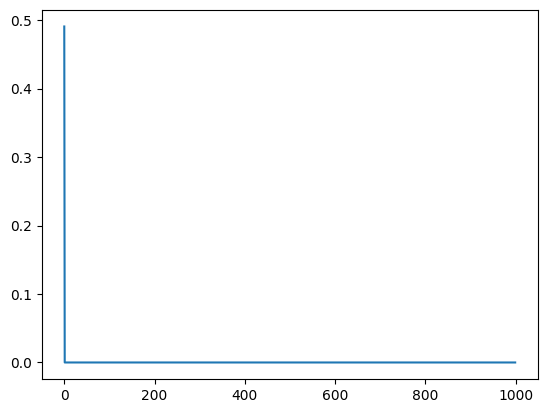

In [33]:

# تقسیم داده‌ها به دو بخش آموزش و آزمون
x_train, x_test, y_train, y_test = train_test_split(df.drop('label', axis=1, inplace=False).values, df.label.values,test_size = 0.2, shuffle = True, random_state = 21)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
class LogisticRegression:

    def __init__(self, n_iter=50, learning_rate=0.005, random_state=None):
        self.n_iter = n_iter
        self.eta = learning_rate
        np.random.seed(random_state)
    def _weight_init(self, num_features):
        self.w = np.random.rand(num_features) * 0
        self.b = np.random.rand()

    def _update(self, x, E):
        dj = np.dot(x.T, E)
        self.w += self.eta * dj
        self.b += self.eta * np.sum(E)

    def _error(self, predict, true):
        E = true - predict
        e = 1 / len(true) * np.dot(E, E)
        return E, e

    def predict(self, x):
        z = np.dot(x, self.w) + self.b
        a = 1 / (1 + np.e**(-z))
        y_hat = np.array([1 if hat > 0.5 else 0 for hat in a])
        return y_hat

    def train(self, x, y):
        num_features = x.shape[1]
        self._weight_init(num_features)
        self.loss = []
        for iter in range(self.n_iter):
            y_hat = self.predict(x)
            E, e = self._error(y_hat, y)
            self.loss.append(e)
            self._update(x, E)


model = LogisticRegression(n_iter=1000, learning_rate=0.4, random_state=21)
model.train(x_train_scaled, y_train)


model = LogisticRegression(n_iter=1000, learning_rate=0.05, random_state=21)
model.train(x_train_scaled, y_train)
plt.plot(model.loss)


فرآیند آموزش و ارزیابی را با استفاده از یک طبقه بند خطی آمادۀ پایتون (در model_linear.sklearn (انجام
داده و نتایج را مقایسه کنید. در حالت استفاده از دستورات آمادۀ سایکیت لرن، آیا راهی برای نمایش نمودار تابع
اتلاف وجود دارد؟ پیاده سازی کنید

In [ ]:
y = y.reshape(1,0)
y.shape

ValueError: cannot reshape array of size 40000 into shape (1,0)

In [38]:
from sklearn.linear_model import SGDClassifier
class SGD(SGDClassifier):
    def __init__(self):
        super().__init__()
        self.loss_history = []
    def partial_fit(self, X, y, classes=None, sample_weight=None):
        super().partial_fit(X, y, classes=classes, sample_weight=sample_weight)
        y_hat  = self.predict(X)
        error =  y_hat-y
        loss = 1/len(y) *  np.dot(error,error)    #mean squared error (MSE)
        self.loss_history.append(loss)

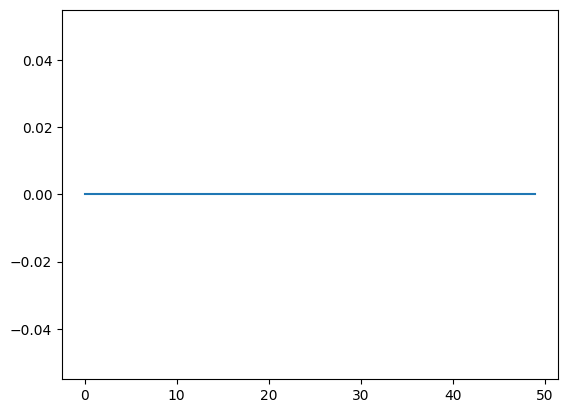

In [40]:
model = SGD()
N_iter = 50

for i in range(N_iter):
    model.partial_fit(x_train_scaled, y_train, classes=np.unique(y_train))

plt.plot(model.loss_history)

۳ سوال سوم
یک دیتاست در زمینۀ آب و هوا با نام 2006-2016 Szeged in Weather را در نظر بگیرید. در این دیتاست هدف آن
است که ارتباط بین Humidity با Temperature و هم چنین ارتباط بین Humidity و Temperature Apparent
پیدا شده و با کمک داده های Humidity و Temperature تخمین انجام شود.
.۱ ابتدا هیت مپ ماتریس همبستگی و هیستوگرام پراکندگی ویژگی ها را رسم و تحلیل کنید.

In [42]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1AbMidVqGDkwuWLshJttuK0sN72tVYw26

Downloading...
From: https://drive.google.com/uc?id=1AbMidVqGDkwuWLshJttuK0sN72tVYw26
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 57.5MB/s]


In [43]:
df1=pd.read_csv('weatherHistory.csv')
print(df1.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

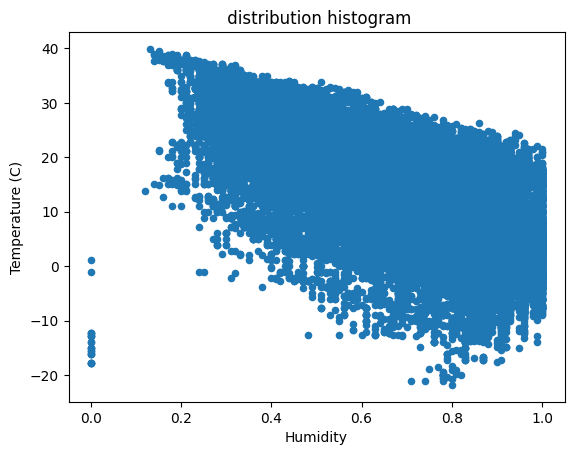

In [12]:
# sns.scatterplot(x=humidity, y=temp, color="green")
# plt.xlabel("Humidity")
# plt.ylabel("Temperature (C)")
# plt.title("Relation between Humidity and Temperature")
# plt.show()
# # # رسم هیستوگرام پراکندگی ویژگی‌ها
df1.plot(kind='scatter', x='Humidity', y='Temperature (C)')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.title(' distribution histogram')#یستوگرام پراکندگی'
plt.show()

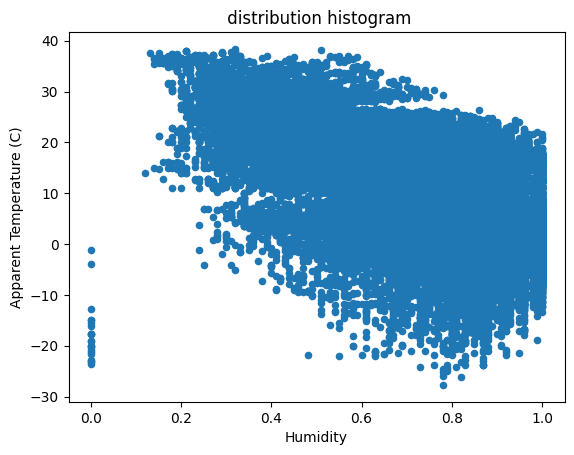

In [14]:
# رسم هیستوگرام پراکندگی ویژگی‌ها
df1.plot(kind='scatter', x='Humidity', y='Apparent Temperature (C)')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.title(' distribution histogram')#یستوگرام پراکندگی'
plt.show()

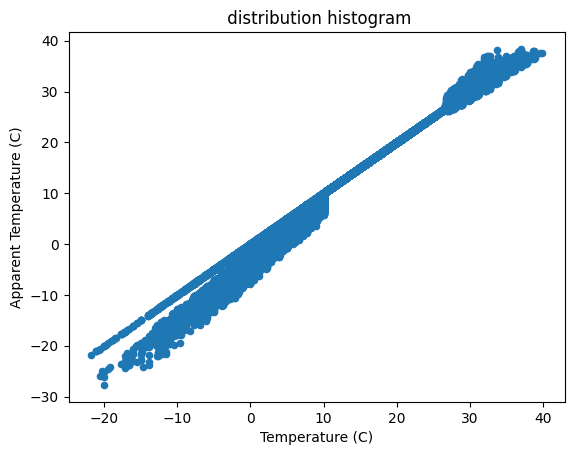

In [15]:
# رسم هیستوگرام پراکندگی ویژگی‌ها
df1.plot(kind='scatter', x='Temperature (C)', y='Apparent Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.title(' distribution histogram')#یستوگرام پراکندگی'
plt.show()

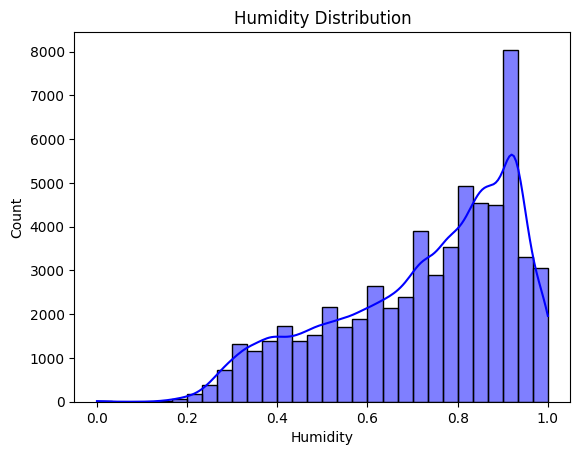

In [7]:
# # رسم هیستوگرام پراکندگی ویژگی‌ها
# df1.plot(kind='scatter', x='Humidity', y='Temperature (C)')
# plt.xlabel('Temperature (C)')
# plt.ylabel('Temperature (C)')
# plt.title(' distribution histogram')#یستوگرام پراکندگی'
# plt.show()
sns.histplot(data=df1, x="Humidity", kde=True, color="green", bins=30)
plt.title("Humidity Distribution")
plt.show()


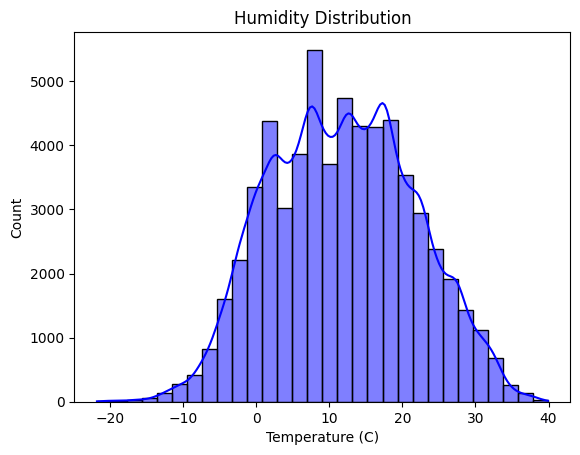

In [9]:
sns.histplot(data=df1, x="Temperature (C)", kde=True, color="green", bins=30)
plt.title("Humidity Distribution")
plt.show()

In [ ]:
sns.histplot(data=df1, x="Apparent Temperature (C)", kde=True, color="green", bins=30)
plt.title("Apparent Temperature Distribution")
plt.show()

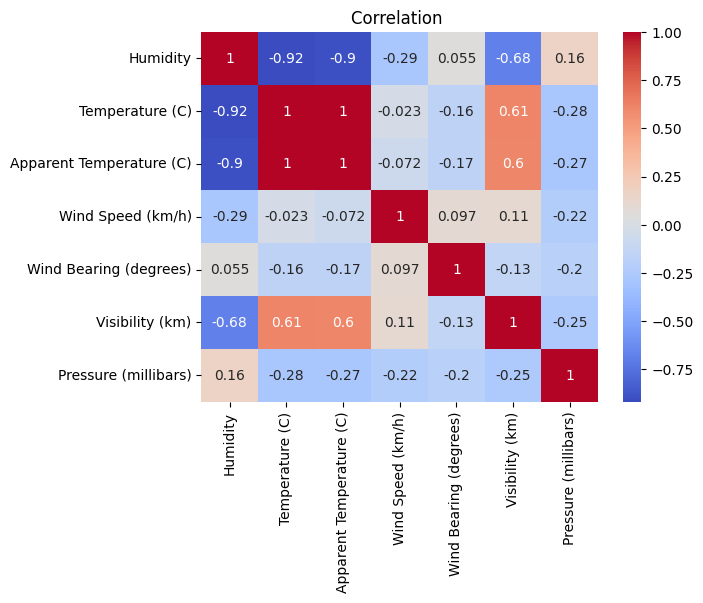

In [5]:
# ماتریس همبستگی بین دو ویژگی
# subset = df1[['Humidity', 'Temperature (C)']]

subset = df1[['Humidity', 'Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']].corr()
corr_matrix = subset.corr()
# رسم هیت‌مپ ماتریس همبستگی
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation ')
plt.show()


۲ روی این دیتاست، تخمین LS و RLS را با تنظیم پارامترهای مناسب اعمال کنید. نتایج به دست آمده را با محاسبۀ
خطاها و رسم نمودارهای مناسب برای هر دو مدل با هم مقایسه و تحلیل کنید.

In [16]:
#تعریف کلاس طبقه بند خطی
class LinearRegressionLS:
    def __init__(self):
        self.coef = None
    def fit(self, X, y):
        X = np.column_stack((np.ones(len(X)), X))
        self.coef = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        return X.dot(self.coef)

In [18]:
df1_fe = df1[['Apparent Temperature (C)','Humidity','Temperature (C)']]
#نمونه برداری از ویژگی های سه ویژگی دیتا ست
df1_train = df1_fe.sample(frac=0.9)
df1_test = df1_fe[~df1_fe.isin(df1_train)].dropna()
scaler = StandardScaler()
ls_models = {}

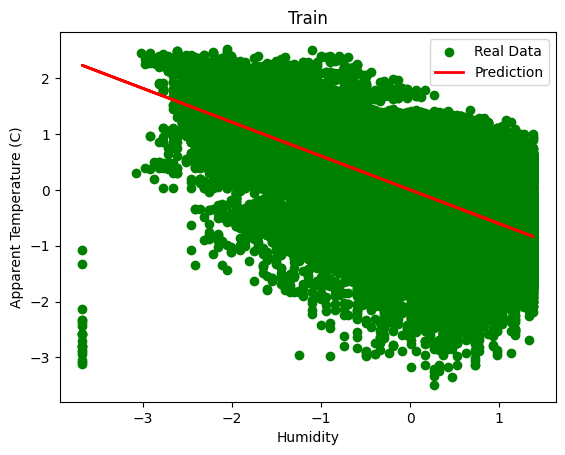

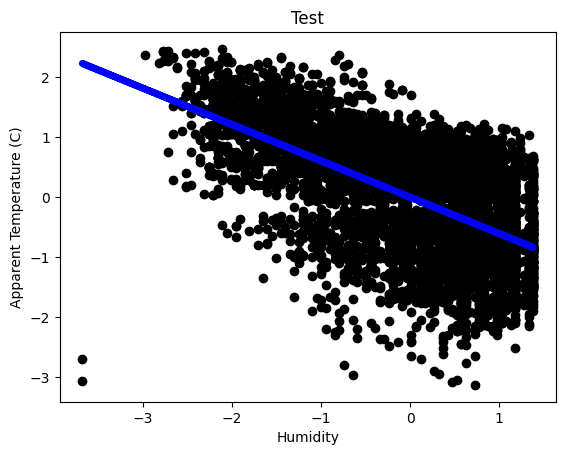

In [22]:
#آموزش الگوریتم
# برای دو ویژگی دیگر
in_train = df1_train['Humidity'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Humidity'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionLS()
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.show()

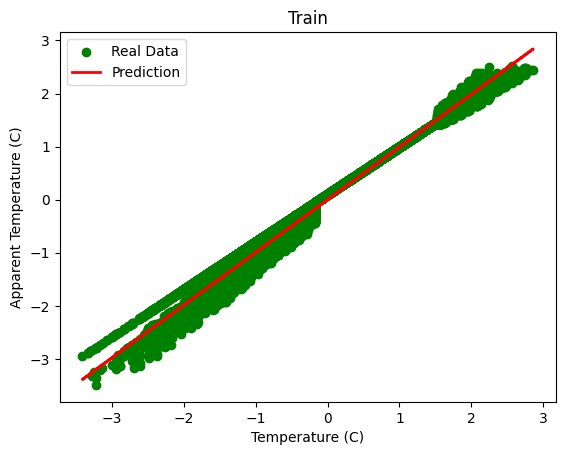

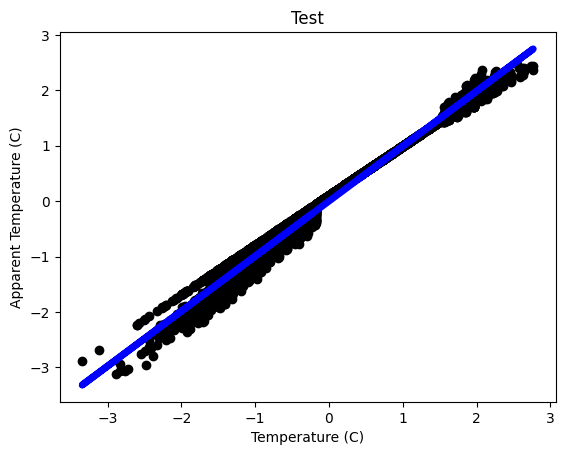

In [19]:
#آموزش الگوریتم
in_train = df1_train['Temperature (C)'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Temperature (C)'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionLS()
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.ylabel('Apparent Temperature (C)')
plt.xlabel('Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.ylabel('Apparent Temperature (C)')
plt.xlabel('Temperature (C)')
plt.show()

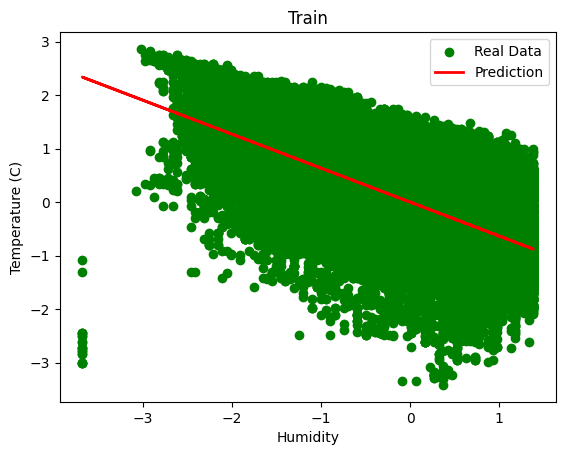

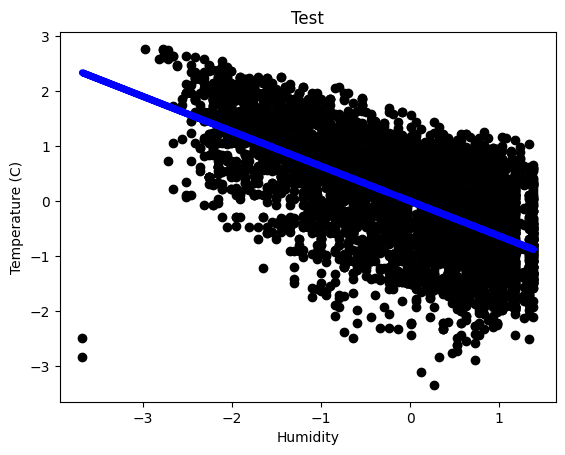

In [24]:
#آموزش الگوریتم
# برای دو ویژگی دیگر
in_train = df1_train['Humidity'].values
out_train = df1_train['Temperature (C)'].values
in_test = df1_test['Humidity'].values
out_test = df1_test['Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionLS()
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.show()


 کد مقایسه دو الگوریتم از نظر خطا
Humidity
Apparent Temperature (C)

In [28]:
in_train = df1_train['Humidity'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Humidity'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionLS()
ls.fit(in_train_scaled, out_train_scaled)

hat_train = ls.predict(in_train_scaled)
hat_test = ls.predict(in_test_scaled)

mse_train = mean_squared_error(out_train_scaled, hat_train)
mse_test = mean_squared_error(out_test_scaled, hat_test)
mae_train = mean_absolute_error(out_train_scaled, hat_train)
mae_test = mean_absolute_error(out_test_scaled, hat_test)
print("Humidity from Apparent Temperature:")
print(f'MSE Train: {mse_train}, MSE Test: {mse_test}, MAE Train: {mae_train}, MAE Test: {mae_test}')

Humidity from Apparent Temperature:
MSE Train: 0.6335066914508463, MSE Test: 0.6324996488829357, MAE Train: 0.647913718981883, MAE Test: 0.6466257142867571


Humidity
Temperature (C)

 کد مقایسه دو الگوریتم از نظر خطا

In [29]:
in_train = df1_train['Humidity'].values
out_train = df1_train['Temperature (C)'].values
in_test = df1_test['Humidity'].values
out_test = df1_test['Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionLS()
ls.fit(in_train_scaled, out_train_scaled)

hat_train = ls.predict(in_train_scaled)
hat_test = ls.predict(in_test_scaled)

mse_train = mean_squared_error(out_train_scaled, hat_train)
mse_test = mean_squared_error(out_test_scaled, hat_test)
mae_train = mean_absolute_error(out_train_scaled, hat_train)
mae_test = mean_absolute_error(out_test_scaled, hat_test)

print(f'MSE Train: {mse_train}, MSE Test: {mse_test}, MAE Train: {mae_train}, MAE Test: {mae_test}')

MSE Train: 0.5972049228241015, MSE Test: 0.5958826514724446, MAE Train: 0.6286284715925173, MAE Test: 0.6277184787702522


Temperature (C)
Aperent Temperature (C)

کد مقایسه دو الگوریتم از نظر خطا

In [30]:
in_train = df1_train['Temperature (C)'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Temperature (C)'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionLS()
ls.fit(in_train_scaled, out_train_scaled)

hat_train = ls.predict(in_train_scaled)
hat_test = ls.predict(in_test_scaled)

mse_train = mean_squared_error(out_train_scaled, hat_train)
mse_test = mean_squared_error(out_test_scaled, hat_test)
mae_train = mean_absolute_error(out_train_scaled, hat_train)
mae_test = mean_absolute_error(out_test_scaled, hat_test)
print("Apparent Temperature from Temperature:")
print(f'MSE Train: {mse_train}, MSE Test: {mse_test}, MAE Train: {mae_train}, MAE Test: {mae_test}')

Apparent Temperature from Temperature:
MSE Train: 0.014945383380887264, MSE Test: 0.01481754997300029, MAE Train: 0.09351484781544303, MAE Test: 0.09343067023445313


تعریف کلاس rls

In [38]:
class LinearRegressionRLS:
    def __init__(self, n_features, forgetting_factor=0.9):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))
        self.P = np.eye(n_features)
    def fit(self, X, y):
        errors = []
        for i in range(len(X)):
            x_i = X[i].reshape(-1, 1)
            y_i = y[i]
            y_pred = np.dot(x_i.T, self.theta)
            error = y_i - y_pred
            errors.append(error)
            K = np.dot(self.P, x_i) / (self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
            self.theta = self.theta + np.dot(K, error)
            self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))
        return errors
    def predict(self, X):
        return np.dot(X, self.theta)

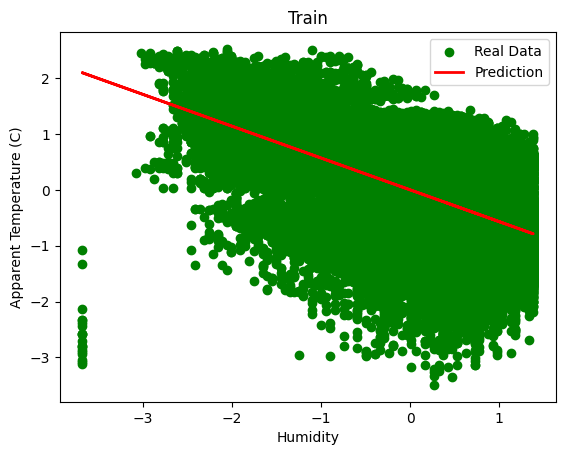

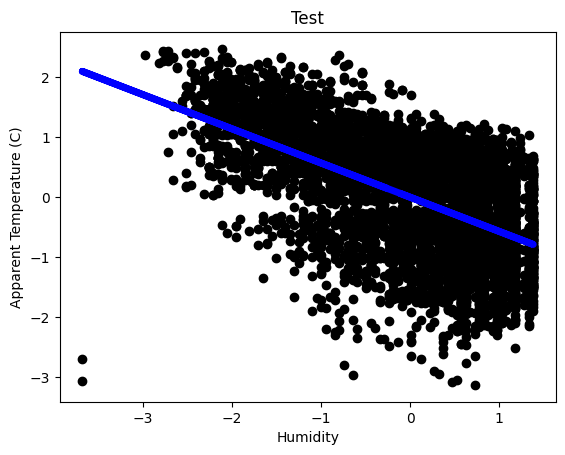

In [39]:
#آموزش الگوریتم
# برای دو ویژگی دیگر
in_train = df1_train['Humidity'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Humidity'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionRLS(n_features=1,forgetting_factor=0.9)
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.show()

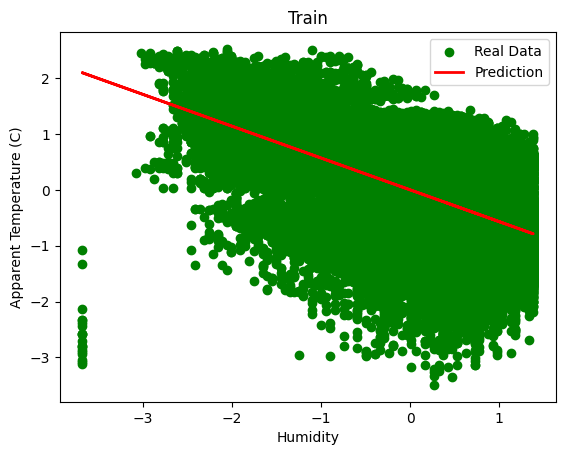

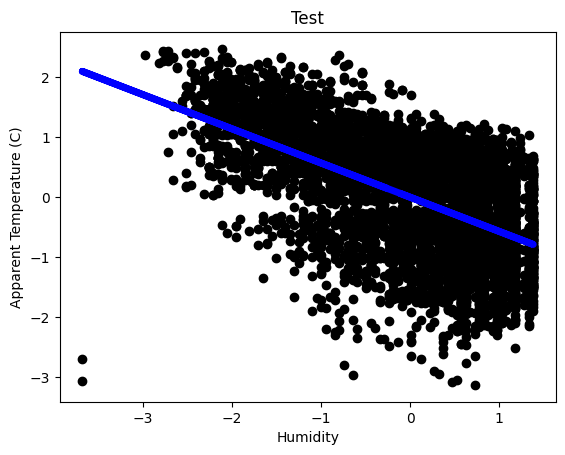

In [45]:
in_train = df1_train['Humidity'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Humidity'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionRLS(n_features=1,forgetting_factor=0.9)
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.show()

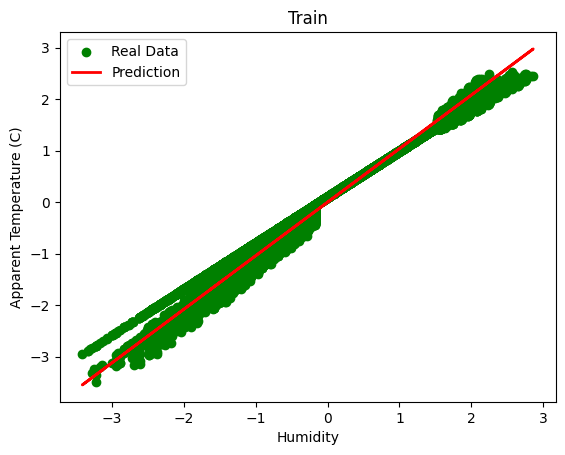

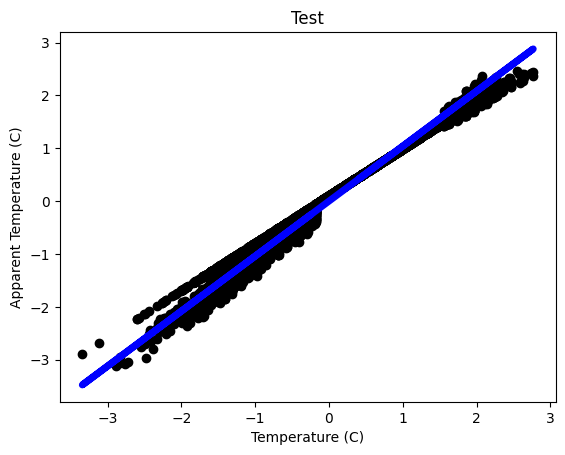

In [42]:
#آموزش الگوریتم
# برای دو ویژگی دیگر
in_train = df1_train['Temperature (C)'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Temperature (C)'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionRLS(n_features=1,forgetting_factor=0.9)
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()

WLS

class WLS

In [47]:
class LinearRegressionWLS:
    def __init__(self):
        self.weights = None
        self.model = None
    def fit(self, X, y):
        self.weights = 1 / np.var(y)
        X_with_intercept = sm.add_constant(X)
        self.model = sm.WLS(y, X_with_intercept, weights=self.weights)
        self.results = self.model.fit()
    def predict(self, X):
        X_with_intercept = sm.add_constant(X)
        return self.results.predict(X_with_intercept)

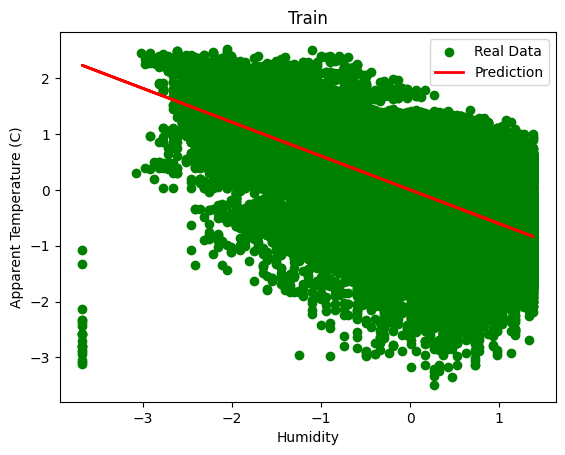

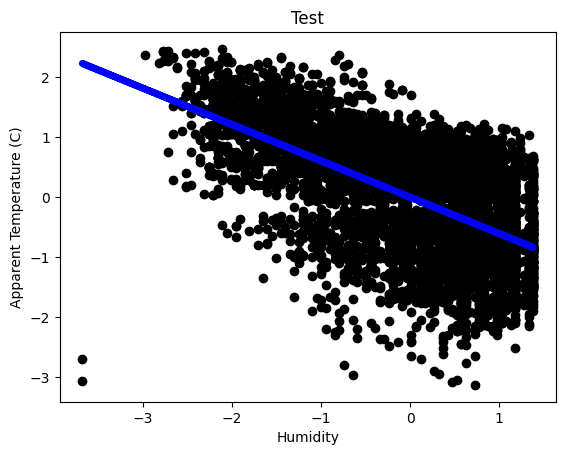

In [48]:
in_train = df1_train['Humidity'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Humidity'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionWLS()
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.show()

Humidity
Temperature (C)

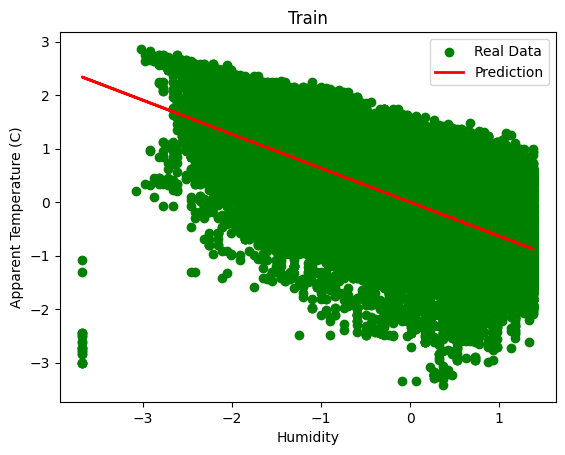

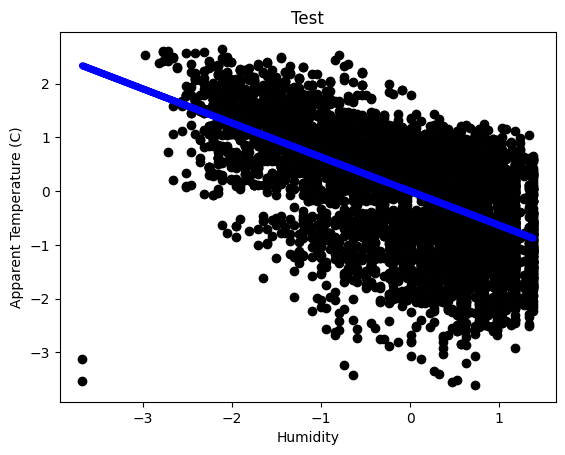

In [49]:
in_train = df1_train['Humidity'].values
out_train = df1_train['Temperature (C)'].values
in_test = df1_test['Humidity'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionWLS()
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.show()

In [ ]:
APParent tempreture
tempreture (c)

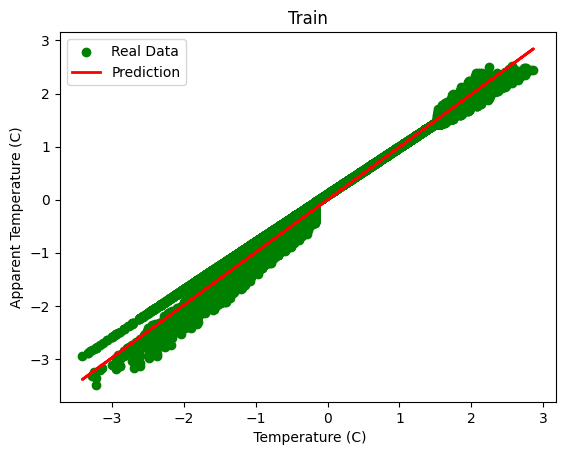

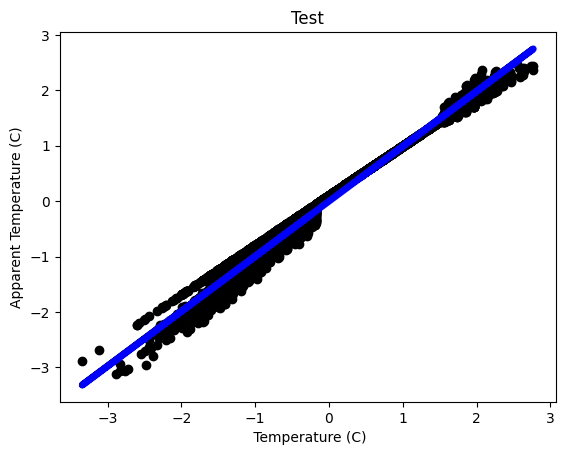

In [51]:
in_train = df1_train['Temperature (C)'].values
out_train = df1_train['Apparent Temperature (C)'].values
in_test = df1_test['Temperature (C)'].values
out_test = df1_test['Apparent Temperature (C)'].values
in_train_scaled = scaler.fit_transform(in_train.reshape(-1, 1))
in_test_scaled = scaler.transform(in_test.reshape(-1, 1))
out_train_scaled = scaler.fit_transform(out_train.reshape(-1, 1))
out_test_scaled = scaler.transform(out_test.reshape(-1, 1))
ls = LinearRegressionWLS()
ls.fit(in_train_scaled, out_train_scaled)

plt.figure()
plt.scatter(in_train_scaled, out_train_scaled, c='green', label='Real Data')
#prediction
hat_train = ls.predict(in_train_scaled)
plt.plot(in_train_scaled, hat_train, c='red', linewidth=2, label='Prediction')
plt.title('Train')
plt.xlabel(' Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
# Plot Test
plt.figure()
plt.scatter(in_test_scaled, out_test_scaled, c='black', label='Real Data')
hat_test = ls.predict(in_test_scaled)
plt.plot(in_test_scaled, hat_test, c='blue', linewidth=5, label='Prediction')
plt.title('Test')
plt.xlabel(' Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()